# IMPORTING REQUIRED LIBRARIES

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import folium

# GETTING THE DATASET

In [30]:
import requests
import pandas as pd
import io

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
response = requests.get(url)
text = io.StringIO(response.text)
df = pd.read_csv(text)


In [31]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [32]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

# CREATING VISUALIZATION FOR DATA ANALYSIS ON AUTOMOBILE SALES

## TASK 1.1 : using line chart to show the automobile sales fluctuate from year to year

#### creating data for plotting

In [33]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

#### plotting the data

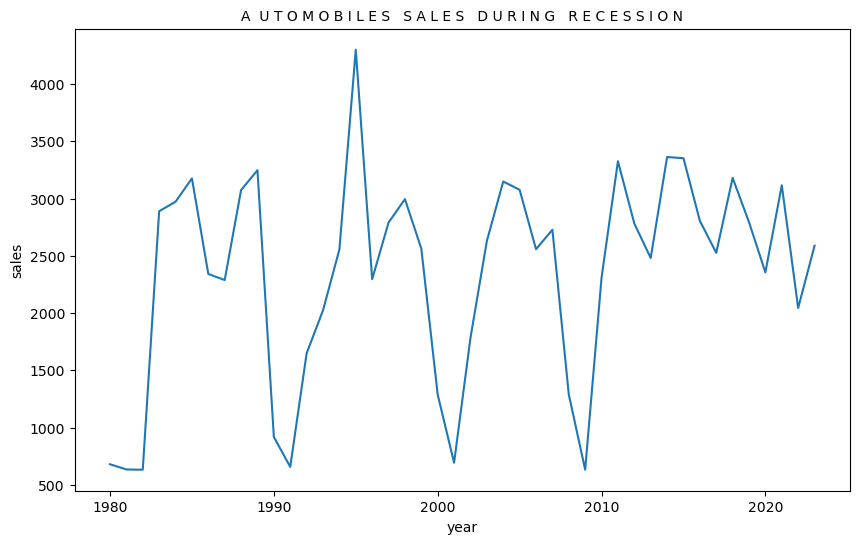

In [34]:
plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xlabel('year')
plt.ylabel('sales')
plt.title('A  U T O M O B I L E S   S A L E S   D U R I N G   R E C E S S I O N', fontsize=10)
plt.show()

## adding ticks on x-axis

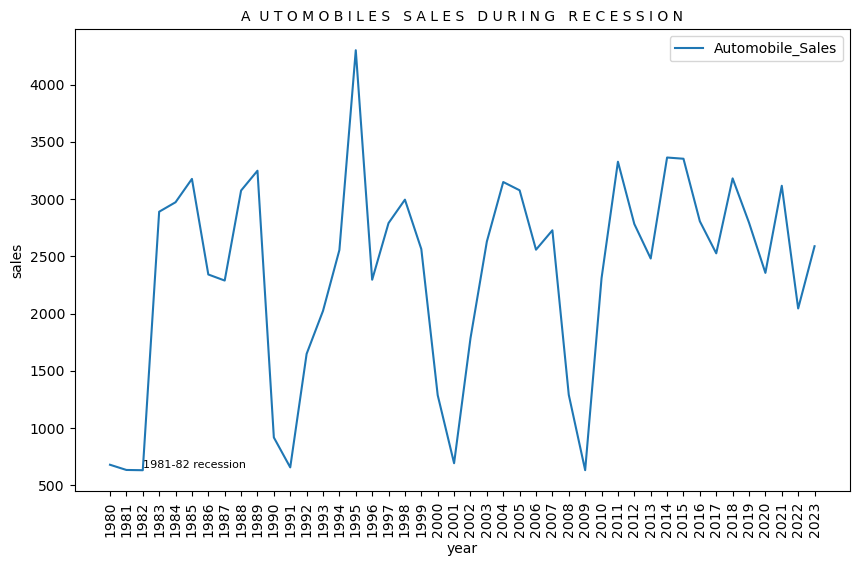

In [35]:
plt.figure(figsize=(10,6))
df_line.plot(kind='line')
plt.xticks(list(range(1980,2024)), rotation = 90)
plt.xlabel('year')
plt.ylabel('sales')
plt.title('A  U T O M O B I L E S   S A L E S   D U R I N G   R E C E S S I O N', fontsize=10)
plt.text(1982, 650, '1981-82 recession', fontsize=8)
plt.legend()
plt.show()

## TASK 1.2 :  plotting different lines for categories of vehicle type and analyse the trend to answer the noticeable difference in sales trends between different vehicle types during recession periods

#### creating the dataframe

In [36]:
df_recession = df[df['Recession'] ==1]

In [37]:
df_recession.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


#### Calculate the average automobile sales by year and vehicle type during the recession

In [38]:
df_Mline = df_recession.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

In [39]:
df_Mline.head()

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,720.625000
1,1980,Smallfamiliycar,695.233333
2,1980,Supperminicar,635.840000
3,1981,Mediumfamilycar,628.400000
4,1981,Smallfamiliycar,638.420000


#### calculating the normalized sales by dividing by the average sales for each vehicle type

In [40]:
df_Mline['Normalized_Sales'] =df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

In [41]:
df_Mline.head()

,Year,Vehicle_Type,Automobile_Sales,Normalized_Sales
0,1980,Mediumfamilycar,720.625000,1.074659
1,1980,Smallfamiliycar,695.233333,1.049896
2,1980,Supperminicar,635.840000,0.947466
3,1981,Mediumfamilycar,628.400000,0.937125
4,1981,Smallfamiliycar,638.420000,0.964100


#### setting the 'Year' as the index

In [42]:
df_Mline.set_index('Year', inplace=True)

In [43]:
df_Mline.head()

,Vehicle_Type,Automobile_Sales,Normalized_Sales
Year,,,
1980,Mediumfamilycar,720.625000,1.074659
1980,Smallfamiliycar,695.233333,1.049896
1980,Supperminicar,635.840000,0.947466
1981,Mediumfamilycar,628.400000,0.937125
1981,Smallfamiliycar,638.420000,0.964100


#### creating the plot

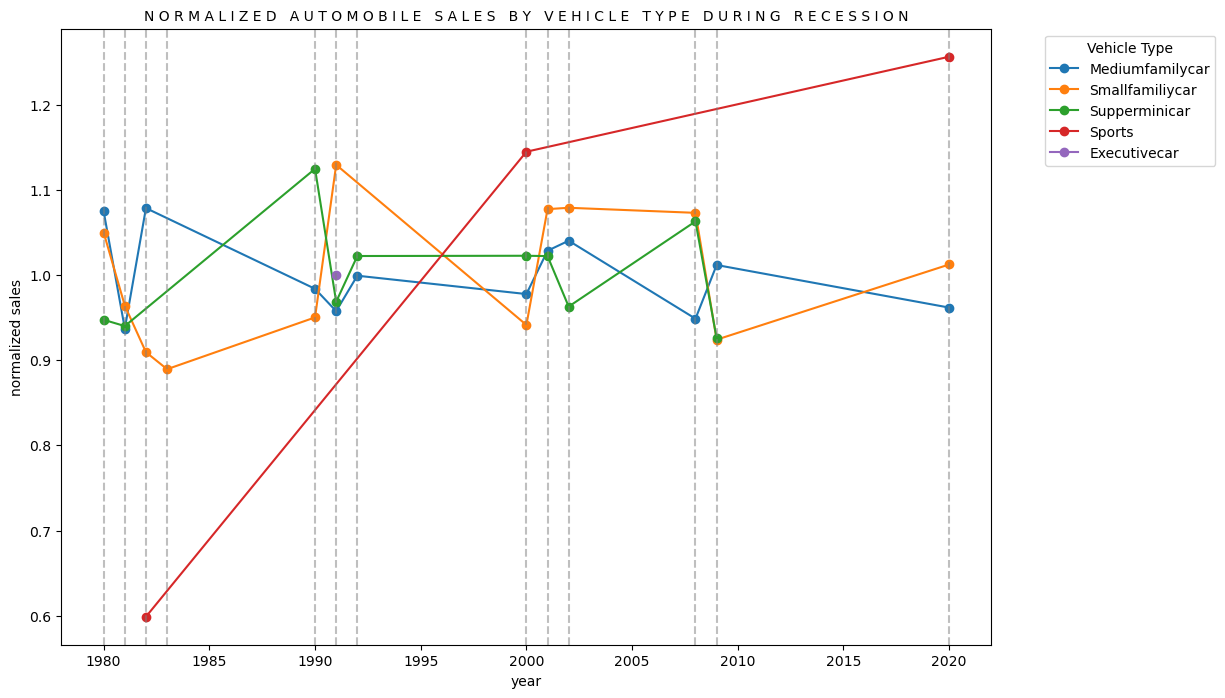

In [44]:
plt.figure(figsize=(12,8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label = vehicle_type, marker ='o')
    
# highlighting recession years
recession_years = df_recession['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    
# adding labels , legends and titles
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1),loc='upper left')
plt.ylabel('normalized sales')
plt.xlabel('year')
plt.title('N O R M A L I Z E D   A U T O M O B I L E   S A L E S   B Y   V E H I C L E   T Y P E   D U R I N G   R E C E S S I O N', fontsize=10)
plt.show()

#### gained insights from the above plots

inference : Sports cars and supermini cars demonstrate resilience or growth during recession periods.Medium family cars and, to a lesser extent, small family cars show more sensitivity to economic changes, with less consistent trends.The upward trend in sports vehicles sales indicates the stability of the luxury market, even during economic downturns.

## TASK 1.3 : creating visualization to compare trend per vehicle type for a recession period with a non-recession period

#### creating the dataframe

In [45]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

In [46]:
new_df.head()

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


#### plotting the chart

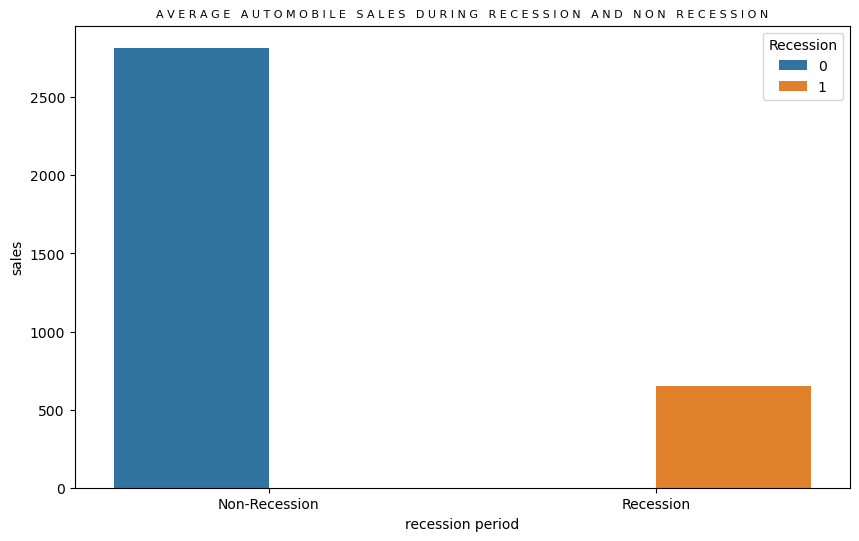

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('recession period')
plt.ylabel('sales')
plt.title('A V E R A G E   A U T O M O B I L E   S A L E S   D U R I N G   R E C E S S I O N   A N D   N O N   R E C E S S I O N', fontsize=8)
plt.xticks(ticks=[0,1], labels=['Non-Recession','Recession'])
plt.show()

### now comparing the sales of different vehicle types during recession and non-recession period

#### creating the data for recessionary periods

In [48]:
recession_data = df[df['Recession'] == 1]

In [49]:
recession_data.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


#### calculating the total sales volume by vehicle type during recessions

In [50]:
sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

In [51]:
sales_by_vehicle_type.head()

,Vehicle_Type,Automobile_Sales
0,Executivecar,564.0
1,Mediumfamilycar,28343.6
2,Smallfamiliycar,23426.4
3,Sports,511.0
4,Supperminicar,20437.4


#### plotting the data

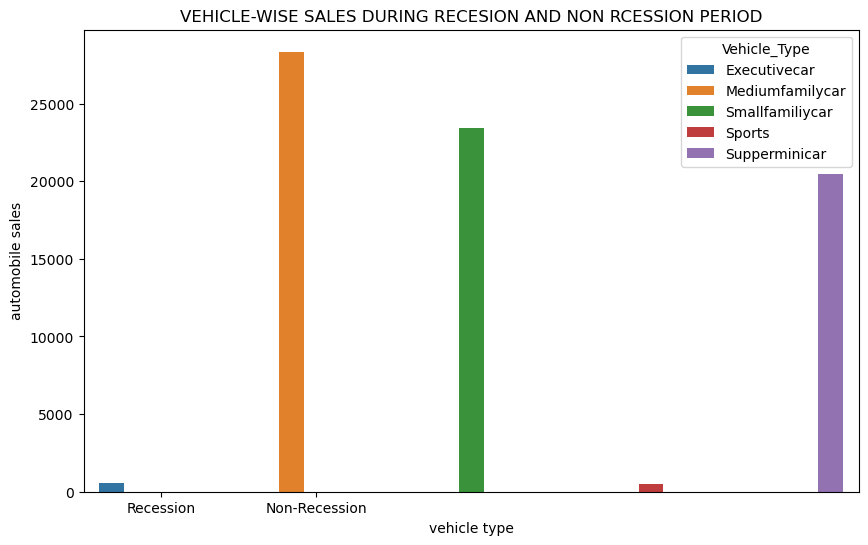

In [52]:
plt.figure(figsize=(10,6))
barplot=sns.barplot(x='Vehicle_Type', y='Automobile_Sales', data=sales_by_vehicle_type, hue='Vehicle_Type')
plt.xticks(ticks=[1,0], labels=['Non-Recession','Recession'])
plt.xlabel('vehicle type')
plt.ylabel('automobile sales')
plt.title('VEHICLE-WISE SALES DURING RECESION AND NON RCESSION PERIOD')
plt.show()

#### gained insights from above chart

INFERENCE : From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports

## TASK 1.4 : using sub plotting to compare te variations in GDP during recession and non-recession period by developing line plots for each period

### fetching GDP variations over time udring recession and non-recession periods

#### creating the dataframe for recession and non-recession period

In [53]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#### plotting the chart

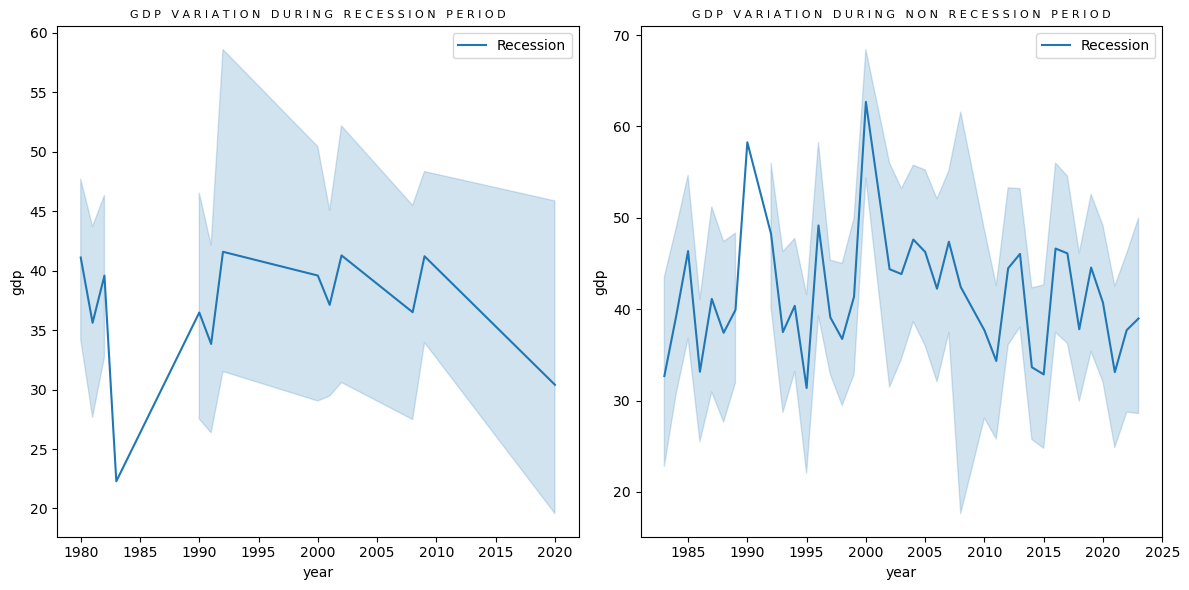

In [54]:
# figure
fig = plt.figure(figsize=(12,6))

# creating different axes for subploting
ax0 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot)

# plt.subplot(1,2,1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('year')
ax0.set_ylabel('gdp')
ax0.set_title('G D P   V A R I A T I O N   D U R I N G   R E C E S S I O N   P E R I O D', fontsize=8)

# plt.subplt(1,2,2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Recession', ax=ax1)
ax1.set_xlabel('year')
ax1.set_ylabel('gdp')
ax1.set_title('G D P   V A R I A T I O N   D U R I N G   N O N   R E C E S S I O N   P E R I O D', fontsize=8)
plt.tight_layout()
plt.show()

#### gained insights from above chart

INFERENCE : from this plot, it is evident that during recession, the GDP of the country was in a low range, might have affected the overall sales of the company

# TAKS 1.5 : developing a bubble plot for displaying automobile sales for every month and use seasonality weight for representing the size of each bubble

#### creating the data for seasonality weight

In [55]:
bubble_size = non_rec_data['Seasonality_Weight']

#### plotting the chart

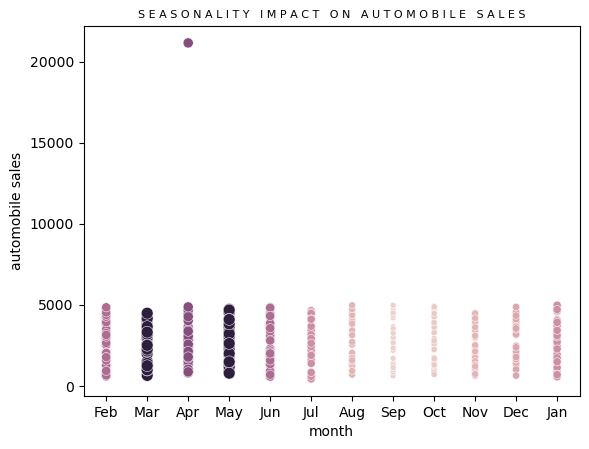

In [56]:
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=bubble_size, hue='Seasonality_Weight', legend=False)
plt.xlabel('month')
plt.ylabel('automobile sales')
plt.title('S E A S O N A L I T Y   I M P A C T   O N   A U T O M O B I L E   S A L E S', fontsize=8)
plt.show()

## TASK 1.6 : developing a scatterplot to identify if there is a correlation between consumer confidence and automobile sales during recession period

#### recession data is already created for this plot as "rec_data".so we skip this step and move to plotting the chart

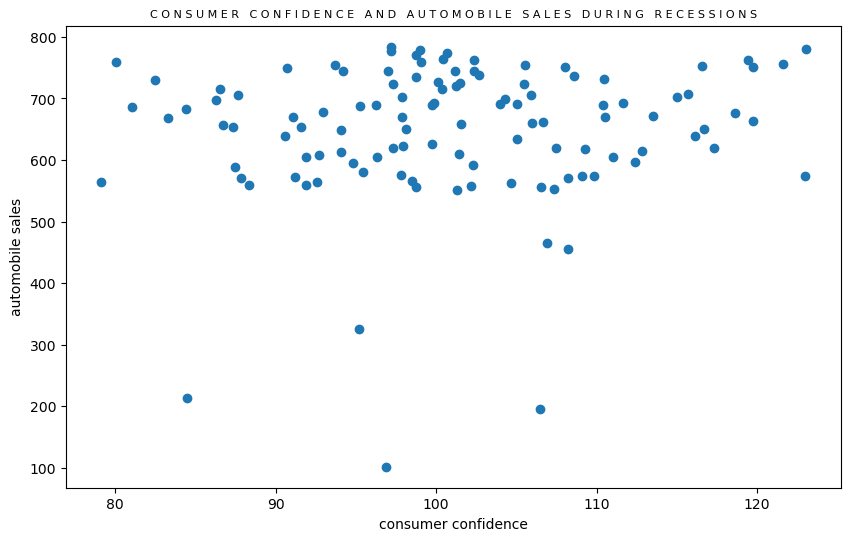

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
plt.xlabel('consumer confidence')
plt.ylabel('automobile sales')
plt.title('C O N S U M E R   C O N F I D E N C E   A N D   A U T O M O B I L E   S A L E S   D U R I N G   R E C E S S I O N S', fontsize=8)
plt.show()

### identifying the correlation between average vehicle price and sales volume during recessions

#### recession data is already created for this plot as "recession_data".so we skip this step and move to plotting the chart

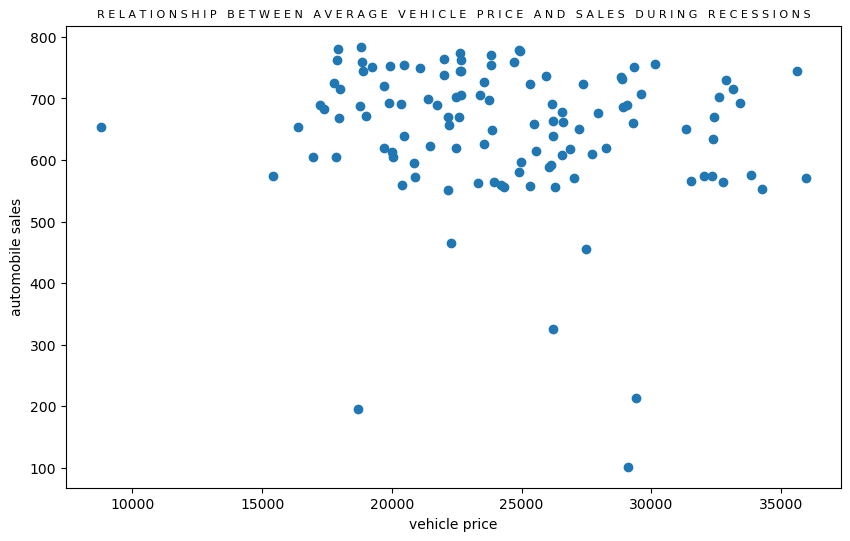

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(recession_data['Price'],rec_data['Automobile_Sales'])
plt.xlabel('vehicle price')
plt.ylabel('automobile sales')
plt.title('R E L A T I O N S H I P   B E T W E E N   A V E R A G E   V E H I C L E   P R I C E   A N D   S A L E S   D U R I N G   R E C E S S I O N S', fontsize=8)
plt.show()

#### gained insights from above chart

INFERENCE : there is not much relation

## TASK 1.7 : creating a pie char tto display the portion of advertising expenditure of xyz automotives during recession and non recession periods

#### creating the dataframe for the plot

In [59]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# calculating the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

In [60]:
Rdata.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


#### plotting the chart

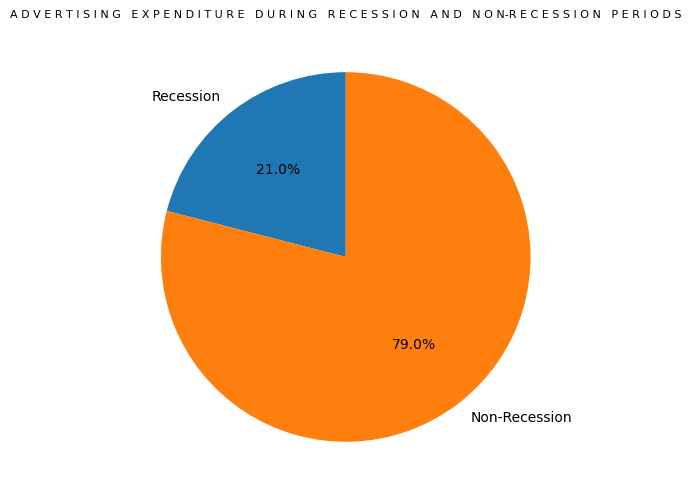

In [61]:
plt.figure(figsize=(10,6))
labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('A D V E R T I S I N G   E X P E N D I T U R E   D U R I N G   R E C E S S I O N   A N D   N O N-R E C E S S I O N   P E R I O D S', fontsize=8)
plt.show()

#### gained insights from above chart

INFERENCE : It seems XYZ Automotives has been spending much more on the advertisements during non-recession periods as compared to during recession times. Fair enough!

## TASK 1.8 : creating a pie chart to display the total advertisement expenditure for each vehicle type during recession period

#### recession data is already created for this plot as "R_data". so we move on to calculating the sales volume by vehicel type during recessions

In [62]:
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

#### plotting the chart

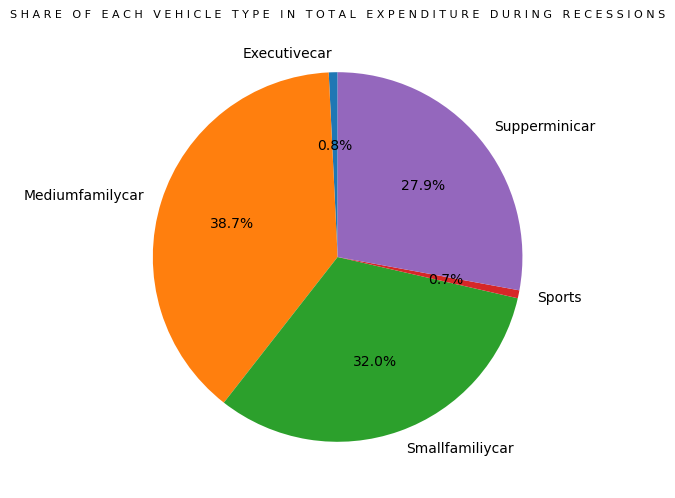

In [63]:
plt.figure(figsize=(10,6))
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('S H A R E   O F   E A C H   V E H I C L E   T Y P E   I N   T O T A L   E X P E N D I T U R E   D U R I N G   R E C E S S I O N S', fontsize=8)
plt.show()

#### gained insights from above chart

INFERENCE : during recession the advertisements were mostly focued on low price range vehicle. A wise decision!

## TASK 1.9 : creating a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the ecession Period.

In [64]:
import warnings
warnings.filterwarnings('ignore')

#### creating the dataframe for the plot

In [65]:
df_rec = df[df['Recession'] == 1]

In [66]:
df_rec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


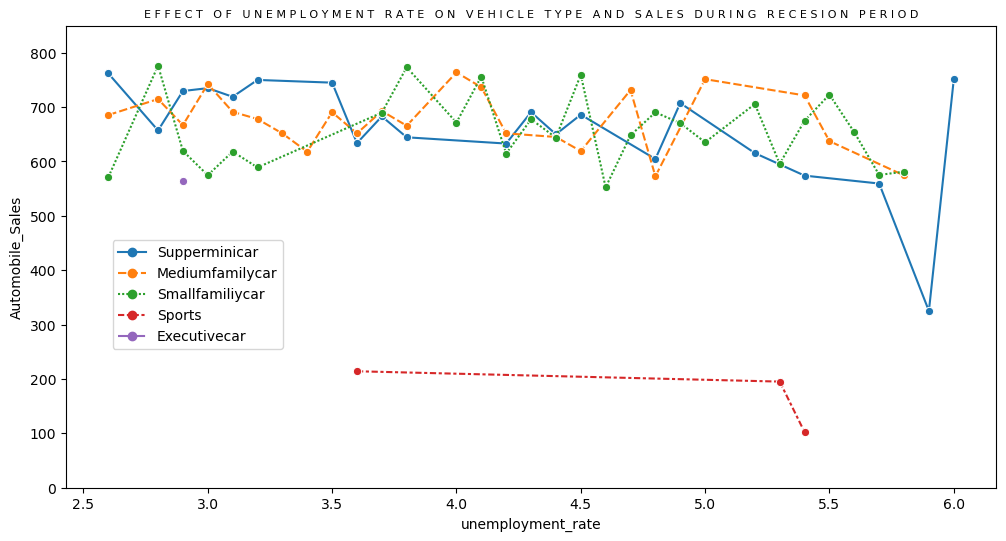

In [67]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0, 850)
plt.legend(loc=(0.05,.3))
plt.title('E F F E C T   O F   U N E M P L O Y M E N T   R A T E   O N   V E H I C L E   T Y P E   A N D   S A L E S   D U R I N G   R E C E S I O N   P E R I O D', fontsize=8)
plt.show()

#### gained insights from above chart

INFERENCE : During recession, buying pattern changed, the sales of low range vehicle like superminicar,smallfamilycar and Mediumminicar

## TASK 1.10 : creating a map to show the recession impact on various city/offices of the company during recession period

#### getting our dataset

In [98]:
import requests 

def download(url, filename):
    resp = requests.get(url)
    if resp.status_code ==200:
        with open(filename, 'wb') as f:
            f.write(resp.content)
            
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
download(path, 'us-states.json')

filename = 'us-states.json'

#### recession data is already created for this plot as "recession_data". so we move on to calculating the sales by city

In [82]:
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

In [99]:
sales_by_city.head()

,City,Automobile_Sales
0,California,18982.6
1,Georgia,17470.5
2,Illinois,16874.7
3,New York,19954.6


#### creating the map

In [101]:
# creating a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# creating a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data = 'us-states.json',
    data = sales_by_city,
    columns = ['City', 'Automobile_Sales'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrRd',
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = 'AUTOMOBILE SALES DURING RECESSION').add_to(map1)

# Adding tooltips to the choropleth layer
choropleth.geojson.add_child(
folium.features.GeoJsonTooltip(['name'], labels=True))

# displaying the map
map1

#### gained insights from above map

INFERENCE : from above map we can conclude that newyork has the most sales during recession period. The most affected region is illinois.